# Lecture 14: LangSmith + Summarization

## LangSmith is tool for monitoring and evaluating LLM applications.

### Setup the LLM

In [2]:
%pip install -U langchain langchain-openai

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.6
    Uninstalling langchain-text-splitters-0.3.6:
      Successfully uninstalled langchain-text-splitters-0.3.6
  Attempting uninstall: langchain-openai
    Found existing installation: langchain-openai 0.3.8
    Uninstalling langchain-openai-0.3.8:
      Successfully uninstalled langchain-openai-0.3.8
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.20
    Uninstalling langchain-0.3.20:
      Successfully uninstalled lang

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.3.19 requires pydantic-settings<3.0.0,>=2.4.0, which is not installed.


In [3]:
from dotenv import load_dotenv
import os

load_dotenv()  # Load environment variables from .env file

os.environ["LANGSMITH_TRACING"]= os.getenv("LANGSMITH_TRACING")
os.environ["LANGSMITH_ENDPOINT"]= os.getenv("LANGSMITH_ENDPOINT")
os.environ["LANGSMITH_API_KEY"]= os.getenv("LANGSMITH_API_KEY")
os.environ["LANGSMITH_PROJECT"]= os.getenv("LANGSMITH_PROJECT")
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY")

from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash-latest")

In [4]:
llm.invoke("What is AI, can it replace human coders answer only yes or no?")

AIMessage(content='No', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-a770cb5b-aa45-4b7f-bc4d-25d4dc5a27b6-0', usage_metadata={'input_tokens': 16, 'output_tokens': 2, 'total_tokens': 18, 'input_token_details': {'cache_read': 0}})

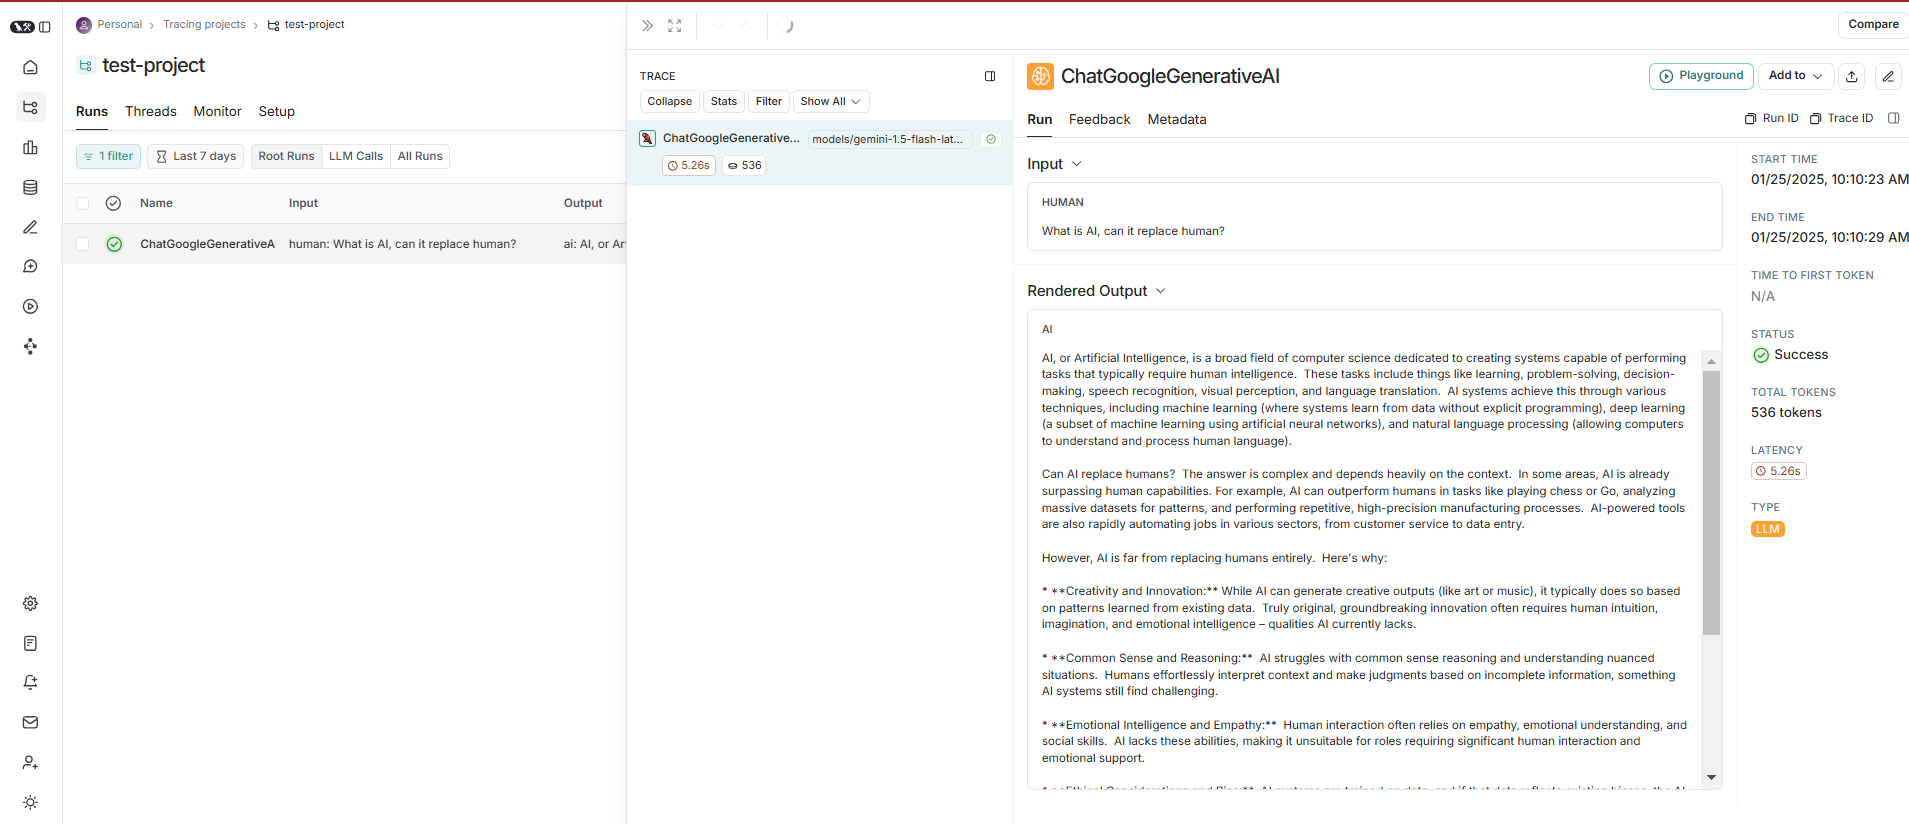

In [6]:
from IPython.display import display, Image

path = "lecture_15_langsmith.PNG"
display(Image(filename=path))  # display image

#### This is a simple summarization feature which will help you summarize the conversation and save on tokens and retain the context of the conversation.

In [7]:
# Summarization
count = 0
messages = []
while True:
    user_input = input("Enter your message: ")
    if user_input.lower() == "exit" or user_input.lower() == "quit" or user_input.lower() == "bye" or user_input.lower() == "end":
        break
    count += 1
    print("This current count is: ", count)
    messages.append("User: " + user_input)

    if count % 3 == 0:
        last_3_messages = messages[-3:]
        print("Last 3 messages: ", last_3_messages)
        
        # rmeove all last messages
        messages = []

        prompt = f"Summarize the conversation so for: {last_3_messages}"
        summary = llm.invoke(prompt)
        print("Summary: ", summary)
        messages.append("Here is the summary of the conversation so far: " + summary.content+ "\nHere is the current question: " + user_input)

    ai_response = llm.invoke(messages)
    messages.append("AI: " + ai_response.content)

    print("This is the messages: after count: ", count, messages)

This current count is:  1
This is the messages: after count:  1 ['User: Hi', 'AI: Hi there! How can I help you today?']
This current count is:  2
This is the messages: after count:  2 ['User: Hi', 'AI: Hi there! How can I help you today?', 'User: houw are you', "AI: AI: I'm doing well, thank you for asking!  How are you today?"]
This current count is:  3
Last 3 messages:  ['User: houw are you', "AI: AI: I'm doing well, thank you for asking!  How are you today?", "User: what's you name"]
Summary:  content="The user asked how the AI was doing, the AI responded politely and asked the user the same question, and then the user asked the AI's name." additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []} id='run-63932cc9-24e6-4fc2-8e24-9acdf0e1f64c-0' usage_metadata={'input_tokens': 46, 'output_tokens': 33, 'total_tokens': 79, 'input_token_details': {'cache_read': 0}}
This is the messages: after coun


## If you want to explore how to implement summarization in Langraph refer this :

https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-2/chatbot-summarization.ipynb